In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from LogisticRegression import LogisticRegression

### Dataset 1


In [2]:
df1 = pd.read_csv("./Datasets/Data1-blobs-2D.csv")
df1.head()

,Feature 0,Feature 1,target
0,5.261949,3.302103,1
1,3.676120,1.016019,1
2,-1.810974,9.407772,0
3,-1.038027,8.804962,0
4,-3.061056,11.572485,0


In [3]:
feats = df1.drop('target', axis=1).values
target = df1.drop(['Feature 0', 'Feature 1'], axis=1).values.reshape(-1)


<AxesSubplot:>

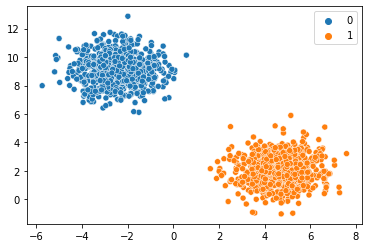

In [4]:
sns.scatterplot(x=feats[:, 0], y=feats[:, 1], hue=target)


In [5]:
X, y = feats, target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

model = LogisticRegression(learning_rate=0.01, is_polynomial=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       168
        True       1.00      1.00      1.00       132

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



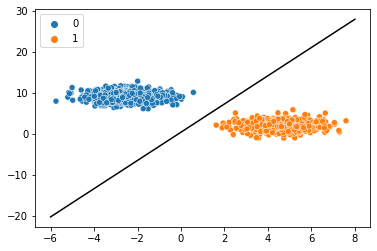

In [6]:
x1 = np.linspace(-6, 8, 20)
x2 = (-np.dot(x1, model.weights[0]) - model.bias) / model.weights[1]
# a1*x1 + a2*x2 + a0 = 0  => x2 = (-a0 - a1*x1)/a2

plt.plot(x1, x2, color='black')
sns.scatterplot(x=feats[:, 0], y=feats[:, 1], hue=target)
plt.show()

In [7]:
print(f"equation: {np.round(model.weights[0], 2)}*x1 + {np.round(model.weights[1], 2)}*x2 + {np.round(model.bias, 2)}")

equation: 1.2*x1 + -0.35*x2 + 0.15


### Dataset 2


To avoid repition I moved the above code inside a function:

In [8]:
def predict_and_plot(df):
    display(df.head())

    feats = df.drop('target', axis=1).values
    target = df.drop(['Feature 0', 'Feature 1'], axis=1).values.reshape(-1)

    print("Data Shape:")
    sns.scatterplot(x=feats[:, 0], y=feats[:, 1], hue=target)
    plt.show()

    X, y = feats, target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=5)

    model = LogisticRegression(learning_rate=0.01, is_polynomial=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_pred, y_test))

    print("\n Fitted Line:")
    x1 = np.linspace(-6, 8, 20)
    x2 = (-np.dot(x1, model.weights[0]) - model.bias) / model.weights[1]

    plt.plot(x1, x2, color='black')
    sns.scatterplot(x=feats[:, 0], y=feats[:, 1], hue=target)
    plt.show()

    print(
        f"equation: {np.round(model.weights[0], 2)}*x1 + {np.round(model.weights[1], 2)}*x2 + {np.round(model.bias, 2)}")


,Feature 0,Feature 1,target
0,-0.490097,0.037513,1
1,0.219836,-0.399650,1
2,-0.854565,-0.349471,0
3,-0.956407,-0.256714,0
4,-0.878756,-0.630345,0


Data Shape:


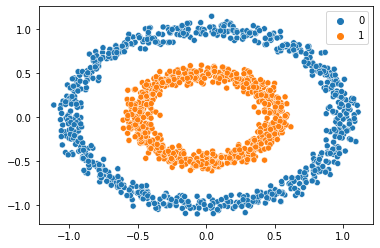

              precision    recall  f1-score   support

       False       0.46      0.46      0.46       149
        True       0.47      0.47      0.47       151

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.46      0.46      0.46       300


 Fitted Line:


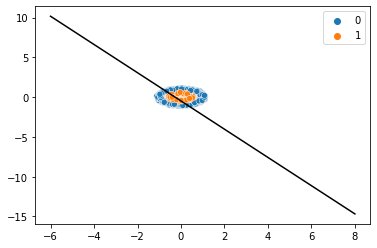

equation: -0.02*x1 + -0.01*x2 + -0.01


In [9]:
df2 = pd.read_csv("./Datasets/Data2-circles-2D.csv")
predict_and_plot(df2)

### Dataset 3


,Feature 0,Feature 1,target
0,0.448412,1.274413,1
1,1.232082,0.814823,1
2,-1.149525,1.218718,0
3,0.472213,-1.356441,1
4,-1.305670,-0.439357,0


Data Shape:


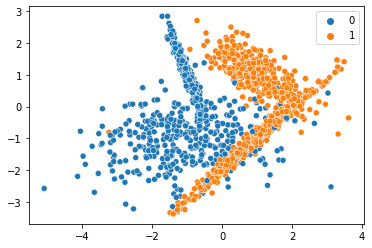

              precision    recall  f1-score   support

       False       0.88      0.87      0.87       149
        True       0.87      0.89      0.88       151

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300


 Fitted Line:


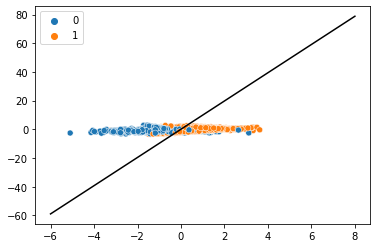

equation: 1.58*x1 + -0.16*x2 + 0.01


In [10]:
df3 = pd.read_csv("./Datasets/Data3-classification-2D.csv")
predict_and_plot(df3)


### Dataset 4


,Feature 0,Feature 1,target
0,-0.473106,0.735324,1
1,0.073681,-0.044260,0
2,-0.585195,0.060913,0
3,0.727723,0.334177,0
4,0.003708,0.033220,0


Data Shape:


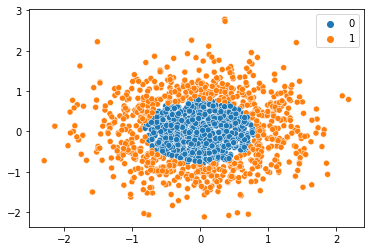

              precision    recall  f1-score   support

       False       0.56      0.56      0.56       157
        True       0.51      0.51      0.51       143

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300


 Fitted Line:


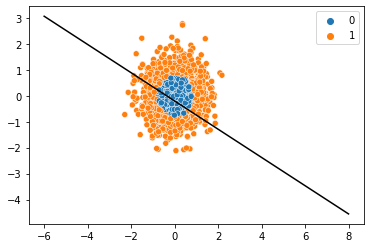

equation: 0.06*x1 + 0.1*x2 + 0.02


In [11]:
d4 = pd.read_csv("./Datasets/Data4-gaussian-2D.csv")
predict_and_plot(d4)


### Dataset 5


,Feature 0,Feature 1,target
0,0.972838,-0.499515,1
1,1.848449,0.025040,1
2,-0.129004,1.014398,0
3,-0.167436,1.043274,0
4,-0.390084,0.913158,0


Data Shape:


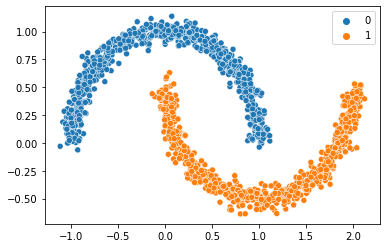

              precision    recall  f1-score   support

       False       0.78      0.84      0.81       138
        True       0.86      0.80      0.83       162

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300


 Fitted Line:


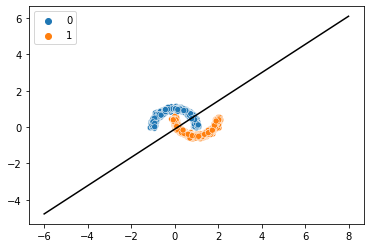

equation: 1.01*x1 + -1.3*x2 + -0.15


In [12]:
df5 = pd.read_csv("./Datasets/Data5-moon-2D.csv")
predict_and_plot(df5)
